In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import seaborn as sns
# Setup matplotlib to work inside the notebook using
%matplotlib inline

In [2]:
df = pd.read_csv('Q6.csv')

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 3 columns):
year          1229 non-null int64
num_coauth    1229 non-null int64
count         1229 non-null int64
dtypes: int64(3)
memory usage: 28.9 KB


,year,num_coauth,count
0,1936,1,12
1,1937,1,15
2,1938,1,9
3,1938,2,1
4,1939,1,18


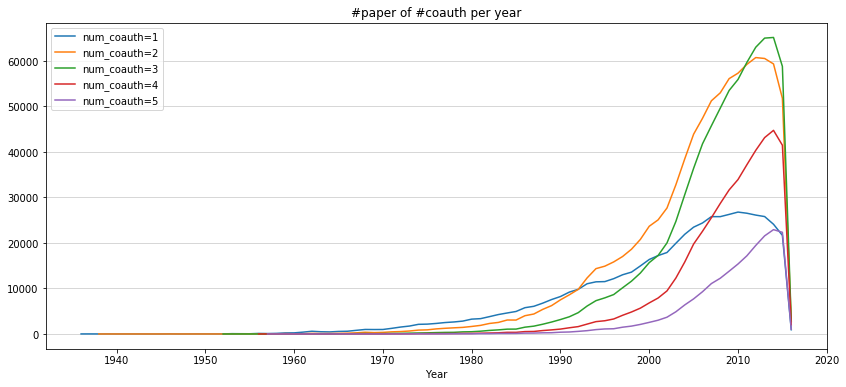

In [66]:
num_values = 5
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xlabel('Year')
ax.set_title('#paper of #coauth per year')
for i in range(1, num_values + 1):
    data = df[df['num_coauth'] == i]
    ax.plot(data['year'], data['count'], label='num_coauth=%r'%i)
ax.grid(axis='y', linestyle='-', linewidth=0.5)
ax.legend();

In [77]:
arr = df.pivot('year', 'num_coauth', 'count').fillna(0).astype(int)
print("The shape of the \'year-#coauthors\' matrix is: %r*%r" %(arr.shape[0],arr.shape[1]))
arr.tail()

The shape of the 'year-#coauthors' matrix is: 81*77


num_coauth,1,2,3,4,5,6,7,8,9,10,...,75,77,79,85,94,95,101,102,114,119
year,,,,,,,,,,,,,,,,,,,,,
2012,26127,60744,63014,40356,19459,8672,3630,1913,1032,583,...,0,0,0,0,0,0,0,0,0,0
2013,25805,60542,65020,43156,21564,9803,4125,2021,1079,651,...,0,0,0,0,0,0,0,0,0,0
2014,24111,59345,65161,44748,22929,10583,4471,2222,1167,672,...,0,0,0,0,0,0,1,0,0,0
2015,21675,51800,58809,41483,22343,10853,4523,2237,1185,686,...,0,0,0,0,0,1,0,0,0,0
2016,930,2670,2838,2035,1048,450,194,105,38,25,...,0,0,0,0,0,0,0,0,0,0


In [79]:
std = {} #a dictionary which stores (#coauthor, variance)
for i in arr.columns:
    std[i] = arr.loc[:, i].std()
##sort the dictionary into a sorted set of tuples
sorted_x = sorted(std.items(), key=operator.itemgetter(1), reverse=True)

In [80]:
k = 10 #set the value of k as you want(k<=100)
top_k_values = [i[0] for i in sorted_x][:k]
print("The top %r values of #coauthors is: %r" %(k, top_k_values))

The top 10 values of #coauthors is: [2, 3, 4, 1, 5, 6, 7, 8, 9, 10]


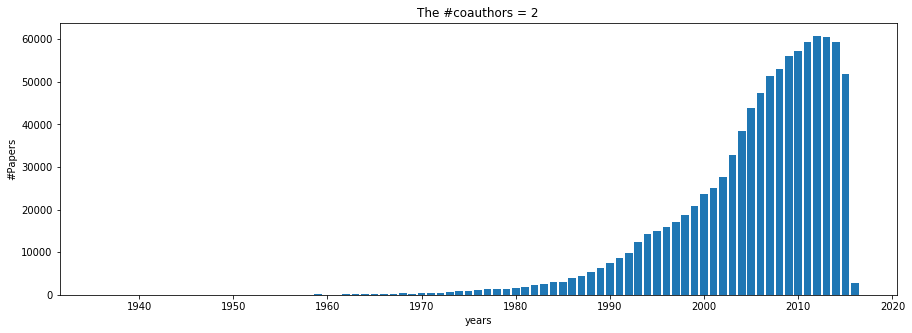

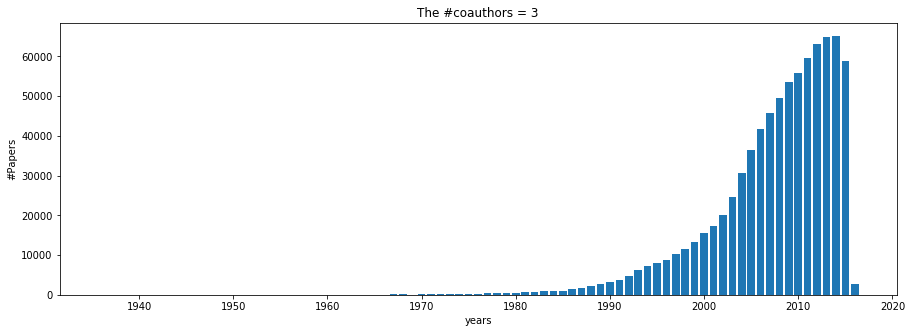

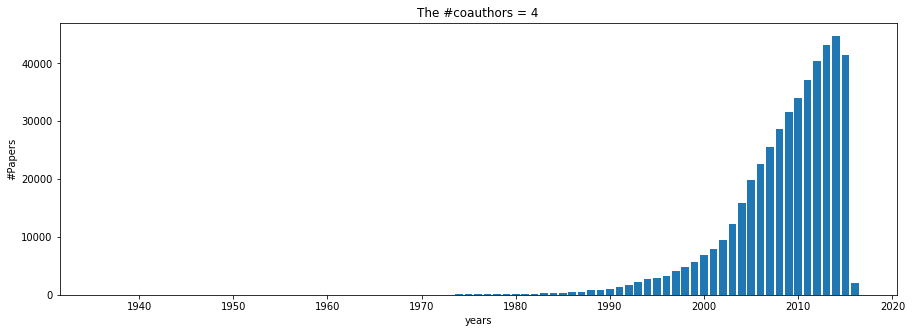

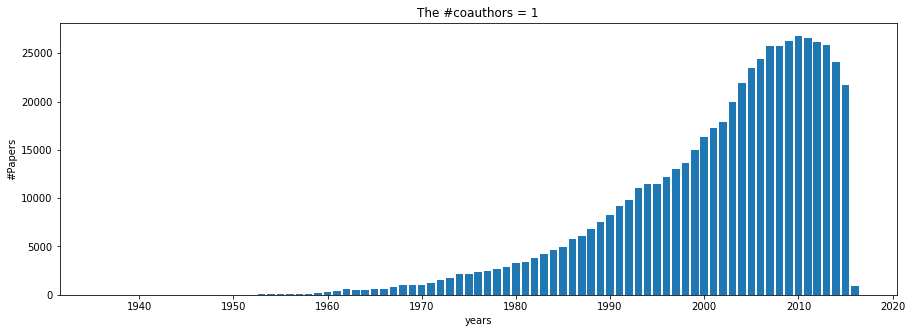

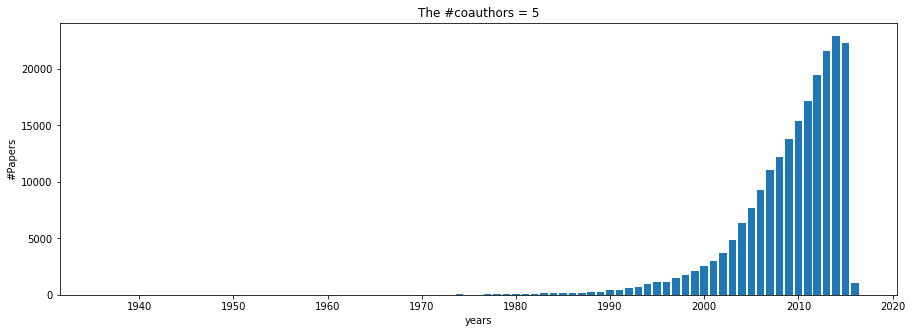

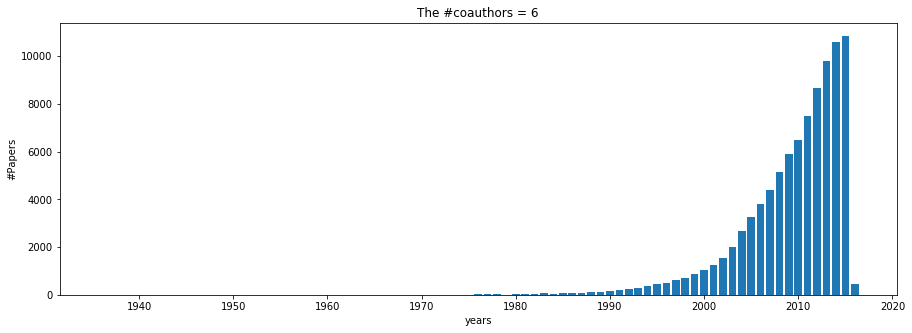

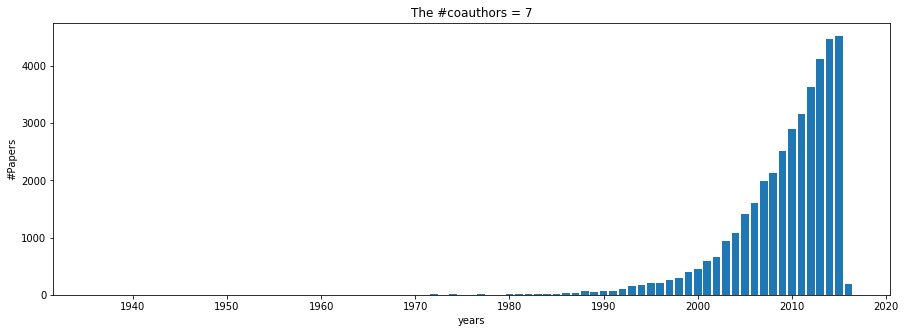

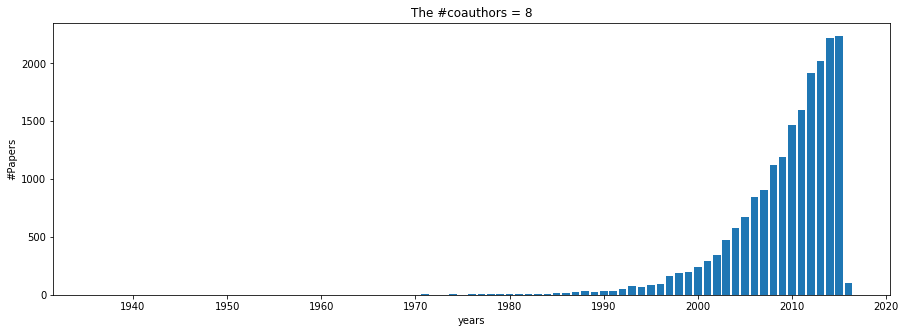

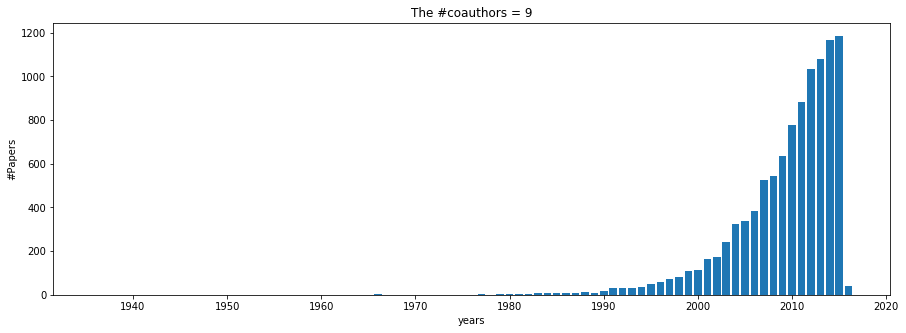

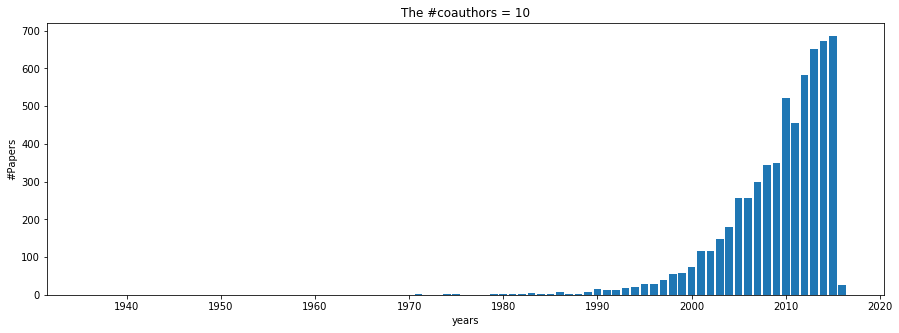

In [81]:
for i in range(k):
    plt.figure(figsize=(15, 5))
    plt.title('The #coauthors = %r' %sorted_x[i][0])
    plt.xlabel('years')
    plt.ylabel('#Papers')
    plt.bar(arr.index, arr.loc[:, sorted_x[i][0]]) # we normalize the 'y' to make data more visual
plt.show()